Primeras filas del DataFrame:
 Transaction ID       Date Customer ID Gender  Age Product Category  Quantity  Price per Unit  Total Amount  Month Clasificacion
              1 2023-11-24     CUST001   Male   34           Beauty         3            50.0         150.0     11         Media
              2 2023-02-27     CUST002 Female   26         Clothing         2           500.0        1000.0      2          Alta
              3 2023-01-13     CUST003   Male   50      Electronics         1            30.0          30.0      1          Baja
              4 2023-05-21     CUST004   Male   37         Clothing         1           500.0         500.0      5         Media
              5 2023-05-06     CUST005   Male   30           Beauty         2            50.0         100.0      5         Media
              6 2023-04-25     CUST006 Female   45           Beauty         1            30.0          30.0      4          Baja
              7 2023-03-13     CUST007   Male   46         Clothing

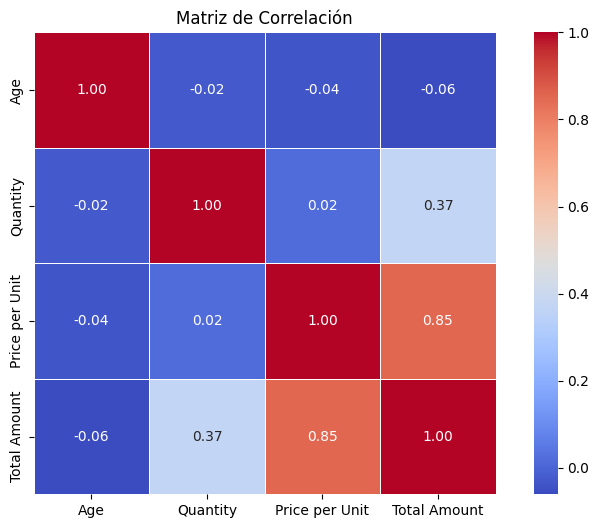

<ipython-input-44-40d98186ea73>:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_plot = df.groupby('Clasificacion')['Quantity'].count().plot(kind='bar', ax=axes[0, 1], color="orange")


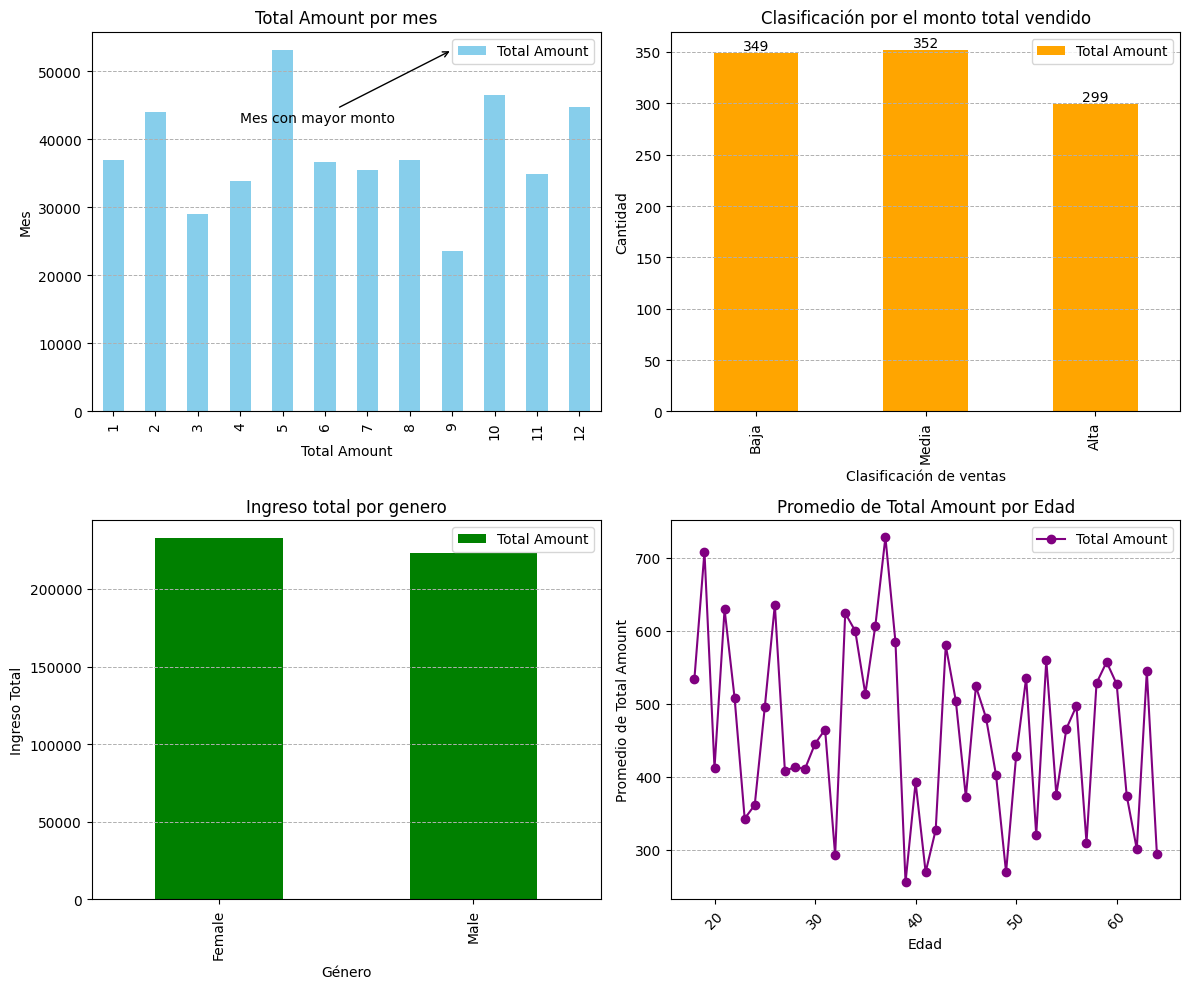

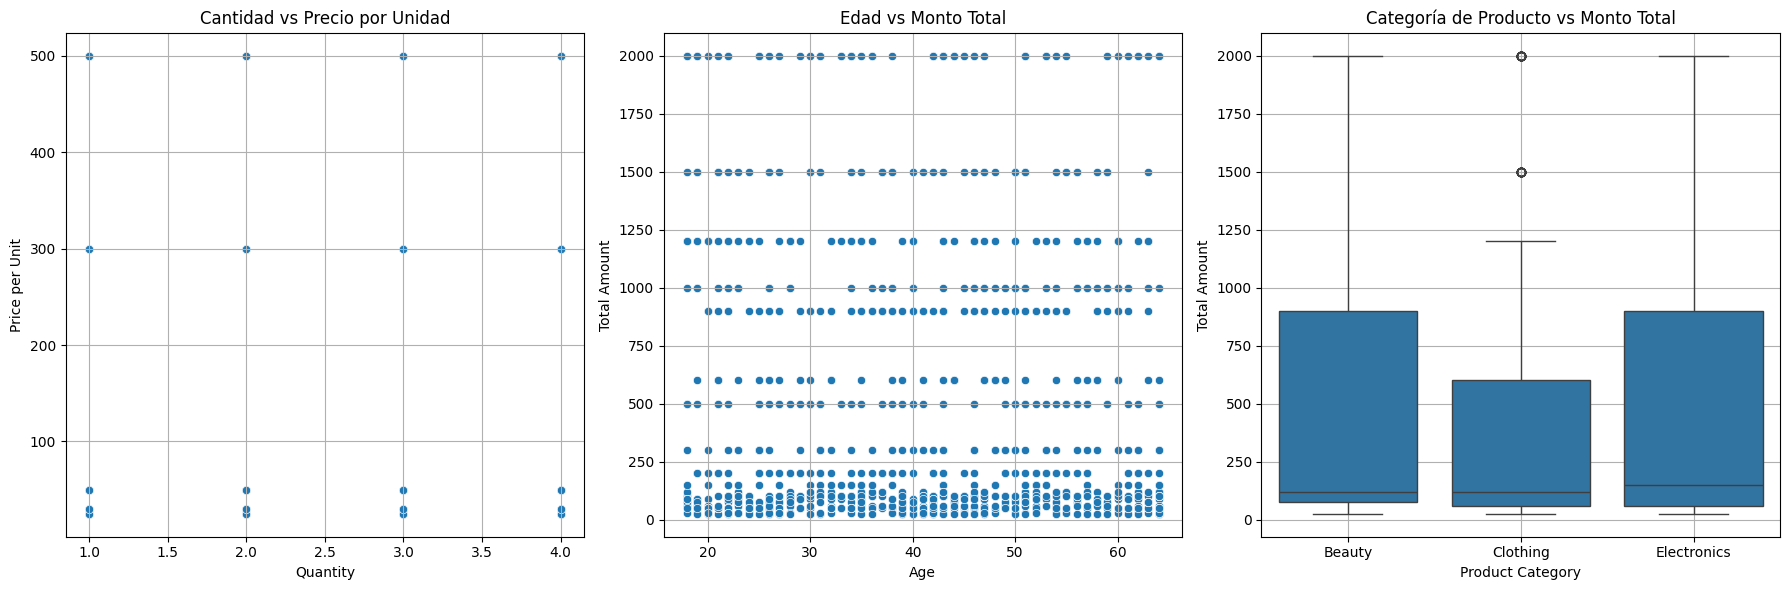

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos desde un archivo CSV
df = pd.read_csv('/content/retail_sales_dataset.csv')

# Conversión tipo de columna
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Quantity'] = df['Quantity'].astype(int)
df['Price per Unit'] = df['Price per Unit'].astype(float)
df['Total Amount'] = df['Total Amount'].astype(float)

# Crear la columna Month basada en la columna Date
df['Month'] = df['Date'].dt.month

# Crear la columna "Clasificacion" según los terciles
# Calcular los límites de los terciles
tercile_1 = df['Total Amount'].quantile(0.33)  # Primer tercil (33%)
tercile_2 = df['Total Amount'].quantile(0.66)  # Segundo tercil (66%)
# Definir los límites y etiquetas
bins = [0, tercile_1, tercile_2, float('inf')]
labels = ['Baja', 'Media', 'Alta']
df['Clasificacion'] = pd.cut(df['Total Amount'], bins=bins, labels=labels, include_lowest=True)

# Ver las primeras y últimas filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head(100).to_string(index = False))

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Análisis de correlación
corr_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

# Crear un mapa de calor de la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square = True)
plt.title('Matriz de Correlación')
plt.show()

# Creacion de graficos Subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df.groupby('Month')['Total Amount'].sum().plot(kind='bar', ax=axes[0, 0], color = "skyblue")
axes[0, 0].set_title('Total Amount por mes')
axes[0, 0].set_xlabel('Total Amount')
axes[0, 0].set_ylabel('Mes')
axes[0, 0].grid(axis = 'y', linestyle = '--', linewidth = 0.7)
axes[0, 0].legend(['Total Amount'], loc = 'upper right')
axes[0, 0].annotate('Mes con mayor monto',
                    xy = (df['Month'].idxmax(), df.groupby('Month')['Total Amount'].sum().max()),
                    xytext = (3, df.groupby('Month')['Total Amount'].sum().max() * 0.8),
                    arrowprops = dict(facecolor = 'black', arrowstyle = '->'),
                    fontsize = 10)


bar_plot = df.groupby('Clasificacion')['Quantity'].count().plot(kind='bar', ax=axes[0, 1], color="orange")
axes[0, 1].set_title('Clasificación por el monto total vendido')
axes[0, 1].set_xlabel('Clasificación de ventas')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].grid(axis='y', linestyle='--', linewidth=0.7)
axes[0, 1].legend(['Total Amount'], loc='upper right')
# Agregar etiquetas de valor a las barras
for bar in bar_plot.patches:
    # Obtener las coordenadas de cada barra
    x = bar.get_x() + bar.get_width() / 2  # Centro de la barra
    y = bar.get_height()  # Altura de la barra (valor)
    # Agregar la etiqueta en el gráfico
    axes[0, 1].text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')


df.groupby('Gender')['Total Amount'].sum().plot(kind='bar', ax=axes[1, 0], color = "green")
axes[1, 0].set_title('Ingreso total por genero')
axes[1, 0].set_xlabel('Género')
axes[1, 0].set_ylabel('Ingreso Total')
axes[1, 0].grid(axis = 'y', linestyle = '--', linewidth = 0.7)
axes[1, 0].legend(['Total Amount'], loc = 'upper right')

avg_total_by_age = df.groupby("Age")[["Total Amount"]].mean().reset_index()
axes[1, 1].plot(avg_total_by_age["Age"], avg_total_by_age["Total Amount"], color="purple", marker="o")
axes[1, 1].set_title("Promedio de Total Amount por Edad")
axes[1, 1].set_xlabel("Edad")
axes[1, 1].set_ylabel("Promedio de Total Amount")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis = 'y', linestyle = '--', linewidth = 0.7)
axes[1, 1].legend(['Total Amount'], loc = 'upper right')
axes[1, 1].annotate('Punto mas alto',
                    xy = (df['Age'].idxmax(), df.groupby('Age')['Total Amount'].mean().max()),
                    xytext = (10, df.groupby('Age')['Total Amount'].mean().max() * 0.8),
                    arrowprops = dict(facecolor = 'black', arrowstyle = '->'),
                    fontsize = 10)

plt.tight_layout()
plt.show()

# Subplots para comparar variables clave
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfica 1: Quantity vs Price per Unit
sns.scatterplot(x='Quantity', y='Price per Unit', data=df, ax=axes[0])
axes[0].set_title('Cantidad vs Precio por Unidad')
axes[0].grid(True)

# Gráfica 2: Age vs Total Amount
sns.scatterplot(x='Age', y='Total Amount', data=df, ax=axes[1])
axes[1].set_title('Edad vs Monto Total')
axes[1].grid(True)

# Gráfica 3: Product Category vs Total Amount
sns.boxplot(x='Product Category', y='Total Amount', data=df, ax=axes[2])
axes[2].set_title('Categoría de Producto vs Monto Total')
axes[2].grid(True)

# Ajustar presentación
plt.tight_layout()
plt.show()

In [ ]:
zº